In [80]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import time
import math

% matplotlib inline

## Simulate Poisson process

Generate sparse event in small time bins with fixed expected rateand compare with analytical Poisson distribution

In [103]:
###numerical
T = 1000  #seconds
dt = 0.01
rate = 10 #events per second
threshold = 1 - rate*dt;  #change threshold to fix event rate
timeseries = np.random.rand(int(T/dt))
timeseries[timeseries>threshold] = 1
timeseries[timeseries<=threshold] = 0

###analytical
Ns = np.linspace(0,30,30,dtype = int)
Pn = np.array([np.exp(-rate)*rate**nn/math.factorial(nn) for nn in Ns])

In [104]:
tau = 1  #in seconds
window = int(tau/dt)
samples = np.array([timeseries[tt:tt+window] for tt in range(0,len(timeseries)-window)])
samp_rate = np.sum(samples,axis=1)/tau

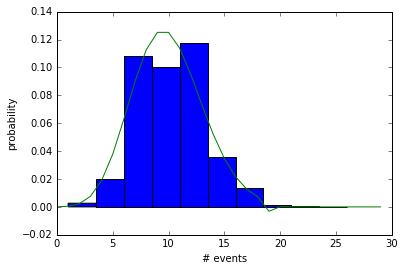

In [105]:
plt.hist(samp_rate,normed=True);
#plt.hold(True)
plt.plot(Pn,label='analytic')
plt.xlabel('# events')
plt.ylabel('probability')

## Anaylsis
What is the mean count? The variance? 

Do you have enough data to fill in the whole probability distribution $P_\tau (n)$ for counting $n$ of events in the window? 

How do all of these things change as you change $\tau$? 

What if you go back and make events with a different average rate? Do your numerical results agree with the theoretical expressions?

In [59]:
print('mean=',np.mean(samp_rate))
print('variance=',np.var(samp_rate))
print('ground truth=',rate)

mean= 10.166286286286287
variance= 8.969826348470594
ground truth= 10


In [60]:
def sim_Poisson(T,tau,rate):
    """
    Numerical Poisson process for parameter tuning
    """
    dt = 0.01
    threshold = 1 - rate*dt;
    timeseries = np.random.rand(int(T/dt))
    timeseries[timeseries>threshold] = 1
    timeseries[timeseries<=threshold] = 0
    window = int(tau/dt)
    samples = np.array([timeseries[tt:tt+window] for tt in range(0,len(timeseries)-window)])
    samp_rate = np.sum(samples,axis=1)/tau
    return samp_rate

In [61]:
rep = 10  #repeat test
means = np.array([np.mean(sim_Poisson(T,tau,rate)) for r in range(0,rep)])
varss = np.array([np.var(sim_Poisson(T,tau,rate)) for r in range(0,rep)])
print('mean=',np.mean(means),'±',np.std(means))
print('variance=',np.mean(varss),'±',np.std(varss))
print('ground truth=',rate)

mean= 10.019333333333332 ± 0.12276352887221169
variance= 8.879111602954307 ± 0.3779555831755696
ground truth= 10


mean= 9.55
variance= 6.429722222222222
mean= 9.936767676767676
variance= 8.154183491480461
mean= 9.886096096096097
variance= 8.872080955730507
mean= 10.082071207120713
variance= 9.017813771907248
mean= 9.996152161521616
variance= 9.014153935826453


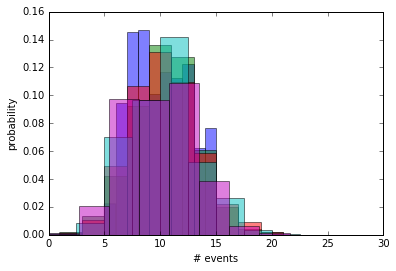

In [123]:
###scaling n events
Ts = np.logspace(1,5,num=5)
tau = 1
rate = 10
for ts in Ts:
    samp_rate = sim_Poisson(ts,tau,rate)
    plt.hist(samp_rate,normed=True,alpha=0.5);
    print('mean=',np.mean(samp_rate))
    print('variance=',np.var(samp_rate))
plt.xlabel('# events')
plt.ylabel('probability')

###->distribution is quite stable when length of simulated data is sufficiently long

mean= 9.928568568568569
variance= 9.533095748801856
mean= 10.007589949748743
variance= 1.8508947544718566
mean= 10.03601616161616
variance= 0.8624325330721356
mean= 9.932067681895093
variance= 0.7638769316853767
mean= 9.945920918367348
variance= 0.5243601212971157


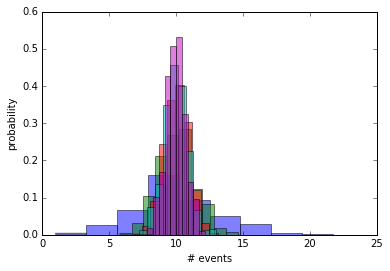

In [124]:
###changing tau
T = 1000
taus = np.array([1,5,10,15,20])
rate = 10
for tos in taus:
    samp_rate = sim_Poisson(T,tos,rate)
    plt.hist(samp_rate,normed=True,alpha=0.5);
    print('mean=',np.mean(samp_rate))
    print('variance=',np.var(samp_rate))
plt.xlabel('# events')
plt.ylabel('probability')

###->the window of tau matters! The variance does not scale correctly when the window is too large

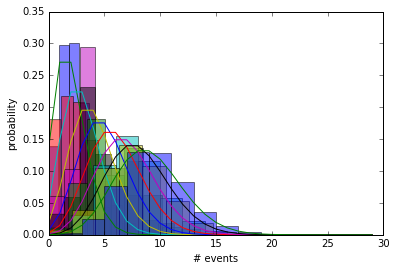

In [65]:
###different rate
T = 1000
tau = 1
rs = np.linspace(2,9,8)
means_rate = []
vars_rate = []
for rr in rs:
    samp_rate = sim_Poisson(T,tau,rr)
    means_rate.append(np.mean(samp_rate))
    vars_rate.append(np.var(samp_rate))
    plt.hist(samp_rate,normed=True,alpha=0.5);
    #theoretical
    Pn = np.array([np.exp(-rr)*rr**nn/math.factorial(nn) for nn in Ns])
    plt.plot(Pn)
plt.xlabel('# events')
plt.ylabel('probability')

###->distribution scales for different rate value and agrees with analytic form

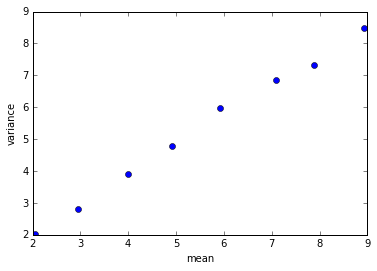

In [66]:
plt.plot(means_rate,vars_rate,'o')
plt.xlabel('mean')
plt.ylabel('variance')

###->mean follows the rate in simulation and the variance scales linearly, as Poisson should be

You should also make a histogram (hist should help) of the times  $\Delta t = t_{i+1} − t_i$ between successive events. The result should be an exponential, $P(\Delta t) \propto e^{-k\Delta t}$, and you should work to get it into a form where it is a properly normalized probability density. What is the connection between $k$ and the Poisson rate $\hat{r}$? 

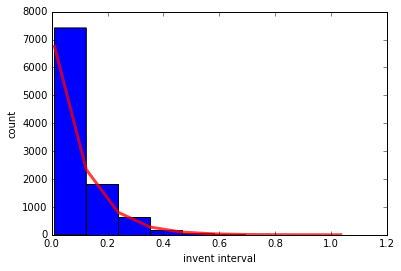

In [132]:
T = 1000  #seconds
dt = 0.01
rate = 10 #events per second
threshold = 1 - rate*dt;  #change threshold to fix event rate
timeseries = np.random.rand(int(T/dt))
timeseries[timeseries>threshold] = 1
timeseries[timeseries<=threshold] = 0

event_t = np.where(timeseries==1)[0]  #event bin intervals
interval = np.diff(event_t)*dt  #turning back to time unit
(n, bins, patches) = plt.hist(interval,bins=10);
plt.xlabel('invent interval')
plt.ylabel('count')
plt.hold(True)

normed = n/max(n)
res = np.polyfit(bins[:-1], np.log(normed+10**-10), 1)  #fitting with y=Aexp(x) with logy=ax+b
plt.plot(bins[:-1],max(n)*np.exp(res[0]*bins[:-1]),linewidth=3,c='r',alpha=0.75)

In [121]:
print('The fitting of k=',res[0], 'and is comparible to the expected rate=',rate)

The fitting of k= -10.136234627129117 and is comparible to the expected rate= 10


## Alternative by choosing time bins

Instead of deciding within each bin about the presence or absence of an event, use the command rand to choose $N$ random times in the big window $T$

In [14]:
N = 100  #random selection
rep = 1000  #repitition
ns = []  #selections
for rr in range(0,rep):
    select = np.random.choice(len(timeseries), N)
    subsampe = timeseries[select]
    ns.append(np.sum(subsampe)/(N*dt))

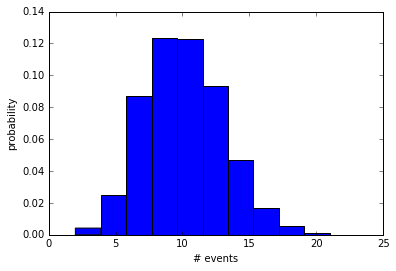

In [15]:
plt.hist(ns,normed=True);
plt.xlabel('# events')
plt.ylabel('probability')

Do you see connections to the statistical mechanics of ideal gases and the
equivalence of ensembles?

The sparse events with an expected rate in independent time bins can be described by the grand canonical ensemble of ieal gas. Where the events are indistinguishable particles and the number of events is the time window is the state (number of particles in a particular energy state, which is binary in this case). 

The number fluctuation follows a Poisson distribution with a expected number of particles within the time window. The grand canonical ensemble of $N$ particles in the system is (with inverse tempertature $\beta$, chemical potential $\mu$, and $N$ particles in state $j$ with energy $E _ { j } ^ { ( N ) }$):

$$
P ( N ) = \frac { \sum _ { j } e ^ { - \beta \left( E _ { j } ^ { ( N ) } - \mu N \right) } } { \sum _ { N } \sum _ { j } e ^ { - \beta \left( E _ { j } ^ { ( N ) } - \mu N \right) } } = \frac { z ^ { N } Q _ { N } } { \mathcal { Q } }
$$

where $z=e^{\beta \mu}$ is the fugacity, $Q _ { N } = \frac { \left( Q _ { 1 } \right) ^ { N } } { N ! }$ is the canonical partition function for $N$ particles, and $\mathcal { Q } = \sum _ { N } \frac { \left( z Q _ { 1 } \right) ^ { N } } { N ! } = e ^ { z Q _ { 1 } }$ would be the grand canonical partition function. This leads to: 
$$
P ( N ) = \frac{(z Q _ { 1 }) ^ { N } e ^ { - z Q _ { 1 } }}{ N ! }
$$
and by replacing $\langle N \rangle = z Q _ { 1 }$ (via taking derivative of the grand potential respect to the chemical potential), the number fluctuation follows a Poisson distribution:

$$
P ( N ) = \frac { \langle N \rangle ^ { N } e ^ { - \langle N \rangle } } { N ! }
$$

reference:

http://bohr.physics.berkeley.edu/hal/teaching/phys230Sp17/notes/FoxQuantumOpticsChaps5and6.pdf
http://www.cmp.caltech.edu/~mcc/Ph127/a/Lecture_9.pdf
